# Code

###### Libraries needed to run this code are imported here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier,XGBRegressor
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier,VotingClassifier,RandomForestRegressor
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

###### Importing the train and test Datasets

In [4]:
train=pd.read_csv('C:/PGA10/Projects/Skillenza/TRAINING.csv')
test=pd.read_csv('C:/PGA10/Projects/Skillenza/TEST.csv')

###### Saving 'Grade' from train and 'id' from test datasets for later use

In [5]:
train_grade=train['Grade']
test_id=test['id']

###### Dropping 'Grade' from train in order to concatenate the two into a single dataset df

In [6]:
train=train.drop('Grade',axis=1)

df=pd.concat([train,test],axis=0,ignore_index=True)

In [7]:
df.head()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
0,1,305,8.0,2.0,1.0,3.0,NO,0.0,76.0,2,63.0,4,3826$
1,2,344,6.0,7.0,7.0,8.0,no,0.0,83.0,7,97.0,1,4458$
2,3,294,8.0,4.0,3.0,4.0,yes,97.0,78.0,1,88.0,4,4199$
3,4,328,5.0,4.0,2.0,4.0,NO,0.0,91.0,5,86.0,1,3462$
4,5,295,9.0,5.0,3.0,5.0,NaN,NaN,97.0,4,93.0,3,4543$


###### Dropping 'id' column from df

In [8]:
df=df.drop('id',axis=1)

 Removing the '$' symbol at the end of the values in 'EXPECTED' column and converting it into int type

In [9]:
df['EXPECTED']=df['EXPECTED'].str.slice(0, -1, 1)

df['EXPECTED']=df['EXPECTED'].astype(int)

In [10]:
df.head()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
0,305,8.0,2.0,1.0,3.0,NO,0.0,76.0,2,63.0,4,3826
1,344,6.0,7.0,7.0,8.0,no,0.0,83.0,7,97.0,1,4458
2,294,8.0,4.0,3.0,4.0,yes,97.0,78.0,1,88.0,4,4199
3,328,5.0,4.0,2.0,4.0,NO,0.0,91.0,5,86.0,1,3462
4,295,9.0,5.0,3.0,5.0,NaN,NaN,97.0,4,93.0,3,4543


###### Testing for missing values and outliers in the data

In [11]:
df.describe()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
count,10299.000000,10296.000000,10295.000000,10296.000000,10298.000000,8293.000000,10296.000000,10299.000000,10297.000000,10299.000000,10299.000000
mean,325.002913,7.002525,4.995435,4.005245,5.501457,47.223321,90.013112,4.508690,79.029038,3.494320,4033.036508
std,20.481697,1.419969,1.644379,1.581207,1.495858,48.847327,11.824232,1.815055,11.839374,1.699177,493.140286
min,290.000000,5.000000,2.000000,1.000000,3.000000,0.000000,70.000000,1.000000,59.000000,1.000000,2717.000000
25%,307.000000,6.000000,4.000000,3.000000,4.000000,0.000000,80.000000,3.000000,69.000000,2.000000,3678.500000
50%,325.000000,7.000000,5.000000,4.000000,6.000000,0.000000,90.000000,5.000000,79.000000,3.000000,3999.000000
75%,342.000000,8.000000,6.000000,5.000000,7.000000,95.000000,100.000000,6.000000,89.000000,5.000000,4360.000000
max,360.000000,9.000000,8.000000,7.000000,8.000000,120.000000,110.000000,8.000000,99.000000,6.000000,5806.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Data columns (total 12 columns):
Area(total)    10299 non-null int64
Troom          10296 non-null float64
Nbedrooms      10295 non-null float64
Nbwashrooms    10296 non-null float64
Twashrooms     10298 non-null float64
roof           8293 non-null object
Roof(Area)     8293 non-null float64
Lawn(Area)     10296 non-null float64
Nfloors        10299 non-null int64
API            10297 non-null float64
ANB            10299 non-null int64
EXPECTED       10299 non-null int32
dtypes: float64(7), int32(1), int64(3), object(1)
memory usage: 925.4+ KB


In [13]:
df.isnull().sum()

Area(total)       0
Troom             3
Nbedrooms         4
Nbwashrooms       3
Twashrooms        1
roof           2006
Roof(Area)     2006
Lawn(Area)        3
Nfloors           0
API               2
ANB               0
EXPECTED          0
dtype: int64

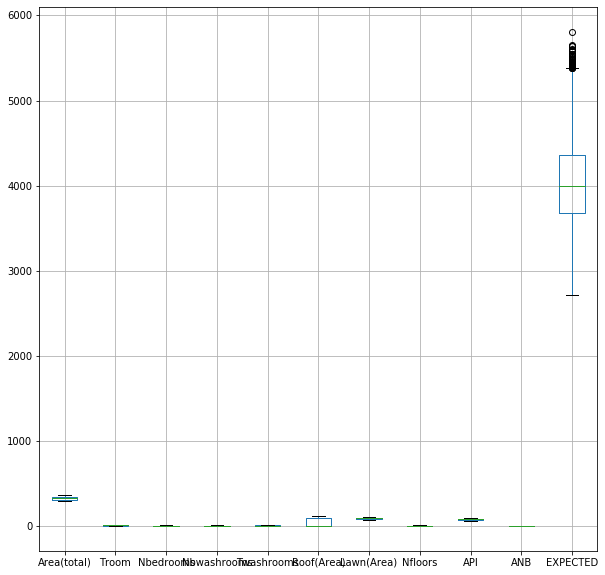

In [47]:
rcParams['figure.figsize']=10,10
df.boxplot()
plt.show()

###### Only 'EXPECTED' has outliers and has no missing values so fix it first by log transformation to scale it down

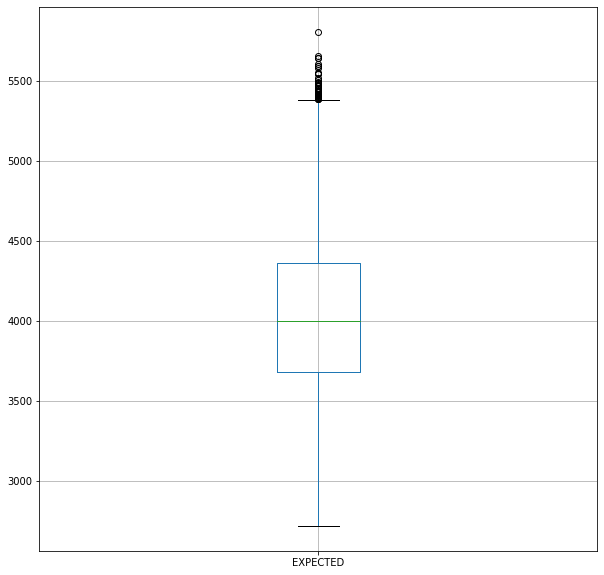

In [48]:
df.boxplot(column='EXPECTED')

In [14]:
df['EXPECTED']=np.log1p(df['EXPECTED'])

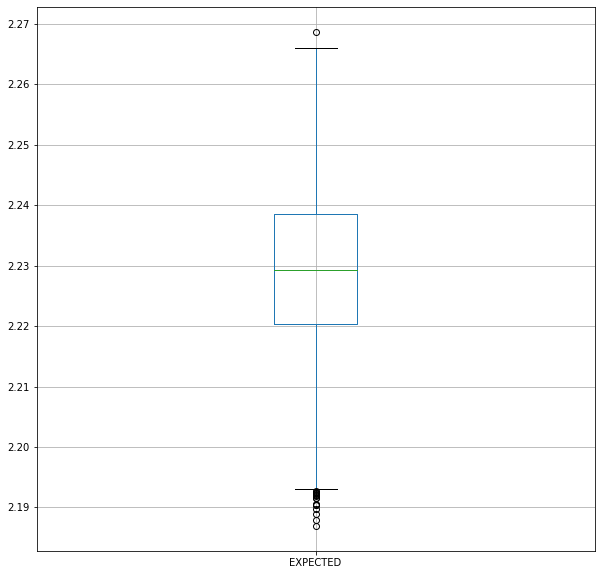

In [52]:
df.boxplot(column='EXPECTED')
plt.show()

###### 'roof' has repeaded levels due to different case 'no' , 'NO' and 'yes,'YES . 
###### Consolidating this:

In [15]:
df['roof'].value_counts()

no     2100
NO     2095
yes    2063
YES    2035
Name: roof, dtype: int64

In [16]:
df['roof'][df['roof']=='yes']='YES'
df['roof'][df['roof']=='no']='NO'
df['roof'].value_counts()

C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


NO     4195
YES    4098
Name: roof, dtype: int64

###### Imputing NaN values of columns with very less missing values with mean:

In [17]:
df.isnull().sum()

Area(total)       0
Troom             3
Nbedrooms         4
Nbwashrooms       3
Twashrooms        1
roof           2006
Roof(Area)     2006
Lawn(Area)        3
Nfloors           0
API               2
ANB               0
EXPECTED          0
dtype: int64

In [18]:
df['Troom']=df['Troom'].fillna(df['Troom'].mean())
df['Nbedrooms']=df['Nbedrooms'].fillna(df['Nbedrooms'].mean())
df['Nbwashrooms']=df['Nbwashrooms'].fillna(df['Nbwashrooms'].mean())
df['Twashrooms']=df['Twashrooms'].fillna(df['Twashrooms'].mean())
df['Lawn(Area)']=df['Lawn(Area)'].fillna(df['Lawn(Area)'].mean())
df['API']=df['API'].fillna(df['API'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Data columns (total 12 columns):
Area(total)    10299 non-null int64
Troom          10299 non-null float64
Nbedrooms      10299 non-null float64
Nbwashrooms    10299 non-null float64
Twashrooms     10299 non-null float64
roof           8293 non-null object
Roof(Area)     8293 non-null float64
Lawn(Area)     10299 non-null float64
Nfloors        10299 non-null int64
API            10299 non-null float64
ANB            10299 non-null int64
EXPECTED       10299 non-null float64
dtypes: float64(8), int64(3), object(1)
memory usage: 965.7+ KB


In [58]:
df.isnull().sum()

Area(total)       0
Troom             0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof           2006
Roof(Area)     2006
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
EXPECTED          0
dtype: int64

###### Since 'roof' and 'Roof(Area)' have large number of missing values , we will impute these by building predictive models.

###### Fixing multicolinearity before building the models

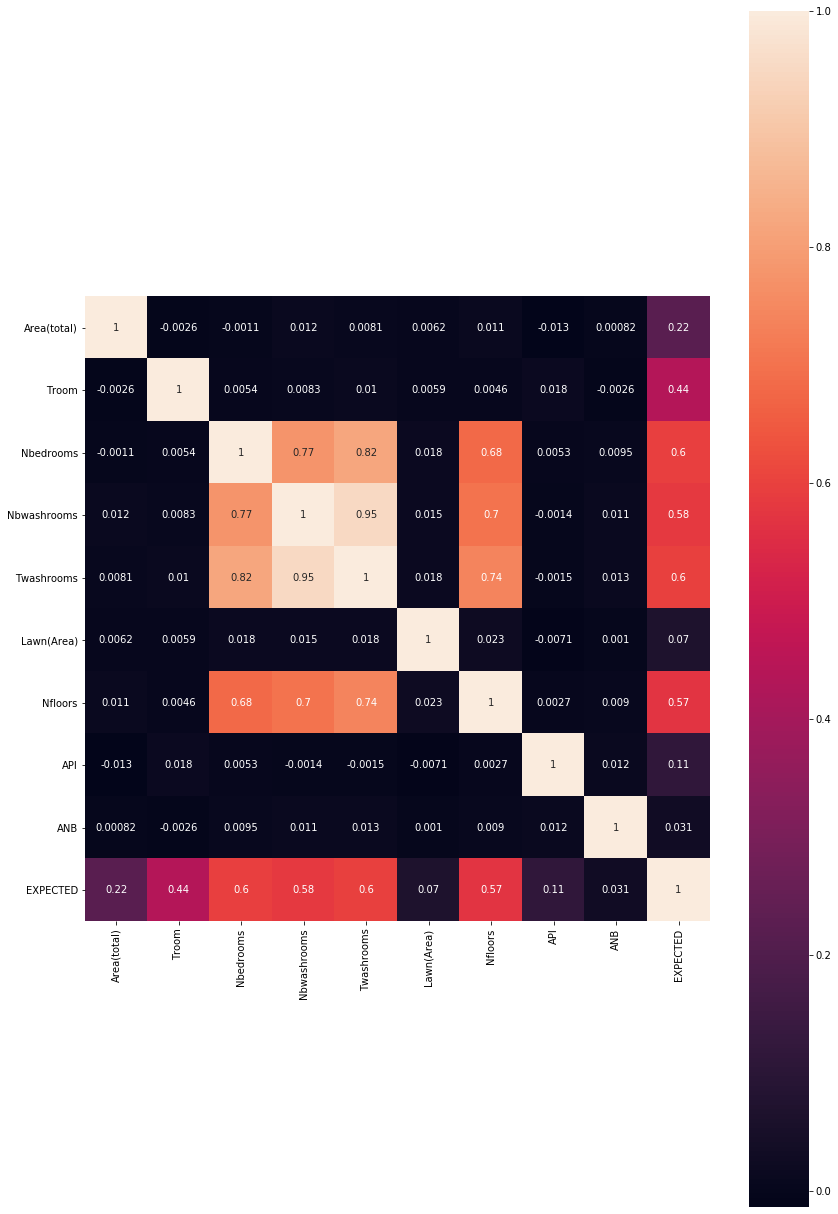

In [20]:
plt.figure(figsize=(14,22))
data=df.drop(['roof','Roof(Area)'],axis=1)
data=data.iloc[:,0:11]
sns.heatmap(data.astype(float).corr(),square=True,linecolor='white',annot=True)
plt.show()

In [21]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif["Columns"] = data.columns

In [22]:
vif.round(2)

,VIF,Columns
0,277.06,Area(total)
1,27.51,Troom
2,32.28,Nbedrooms
3,73.72,Nbwashrooms
4,186.74,Twashrooms
5,59.49,Lawn(Area)
6,16.54,Nfloors
7,46.56,API
8,5.24,ANB
9,515.33,EXPECTED


In [23]:
data.head()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Lawn(Area),Nfloors,API,ANB,EXPECTED
0,305,8.0,2.0,1.0,3.0,76.0,2,63.0,4,8.249836
1,344,6.0,7.0,7.0,8.0,83.0,7,97.0,1,8.402680
2,294,8.0,4.0,3.0,4.0,78.0,1,88.0,4,8.342840
3,328,5.0,4.0,2.0,4.0,91.0,5,86.0,1,8.149891
4,295,9.0,5.0,3.0,5.0,97.0,4,93.0,3,8.421563


#### Scaling and performing PCA to remove multicolinearity among IDVs

In [24]:
scd=StandardScaler()
scaled_data=scd.fit_transform(data)

In [37]:
cov_mat=np.cov(scaled_data.T)

In [43]:
Eigen_val,Eigen_vec=np.linalg.eig(cov_matmat)

In [56]:
Eigen_pair=list(zip(np.abs(Eingen_val),Eigen_vec))

In [60]:
Eigen_pair.sort(key=lambda x: x[0], reverse=True)

In [61]:
Eigen_pair

[(3.845371630132313,
  array([ 0.03523165,  0.00102135,  0.18938863,  0.11501108, -0.05324903,
         -0.34242652, -0.359067  ,  0.61447093,  0.44428432,  0.35451168])),
 (1.2668336057403558,
  array([ 0.02158894,  0.00208272,  0.04153018,  0.03097313, -0.02168283,
         -0.10067333, -0.22827942,  0.34068713, -0.890346  ,  0.15920117])),
 (1.0232378773958177,
  array([ 0.0166128 ,  0.00073243,  0.08596904,  0.06761422, -0.02657859,
         -0.22061365, -0.7206545 , -0.6390901 , -0.00907194,  0.10258146])),
 (1.0025264333861788,
  array([ 3.91950136e-01, -1.52089778e-02, -6.65465992e-01, -4.23076434e-01,
          1.38291794e-01, -4.52339941e-01,  8.93695441e-03,  1.59785947e-02,
          1.52933071e-02, -1.03302816e-04])),
 (0.9962540670645108,
  array([ 0.01123531,  0.00177205,  0.0199647 ,  0.0110965 , -0.00260767,
         -0.03470731,  0.38628844, -0.27790206, -0.04291025,  0.87740977])),
 (0.9738290674781759,
  array([ 4.28473670e-01,  5.44335646e-02,  2.11103448e-01,  2.19

In [91]:
pd.DataFrame(Eigen_val,data.columns).sort_values(0,ascending=False)

,0
Area(total),3.845372
Lawn(Area),1.266834
API,1.023238
EXPECTED,1.002526
ANB,0.996254
Nfloors,0.973829
Twashrooms,0.361158
Nbwashrooms,0.273003
Nbedrooms,0.211785
Troom,0.046973


In [62]:
for i in Eigen_pair:
    print(i[0])

3.845371630132313
1.2668336057403558
1.0232378773958177
1.0025264333861788
0.9962540670645108
0.9738290674781759
0.3611578284620801
0.27300278855680504
0.21178499642553775
0.04697276770043607


In [63]:
tot = sum(Eigen_val)
var_exp = [(i / tot)*100 for i in sorted(Eigen_val, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [77]:
print(var_exp)
cum_var_exp

[38.44998256831006, 12.667106002441184, 10.231385242666398, 10.024290912720518, 9.961573339771167, 9.737345117866052, 3.6112276119064943, 2.7297628085813925, 2.1176443277892867, 0.4696820679474612]


array([ 38.44998257,  51.11708857,  61.34847381,  71.37276473,
        81.33433807,  91.07168318,  94.6829108 ,  97.4126736 ,
        99.53031793, 100.        ])

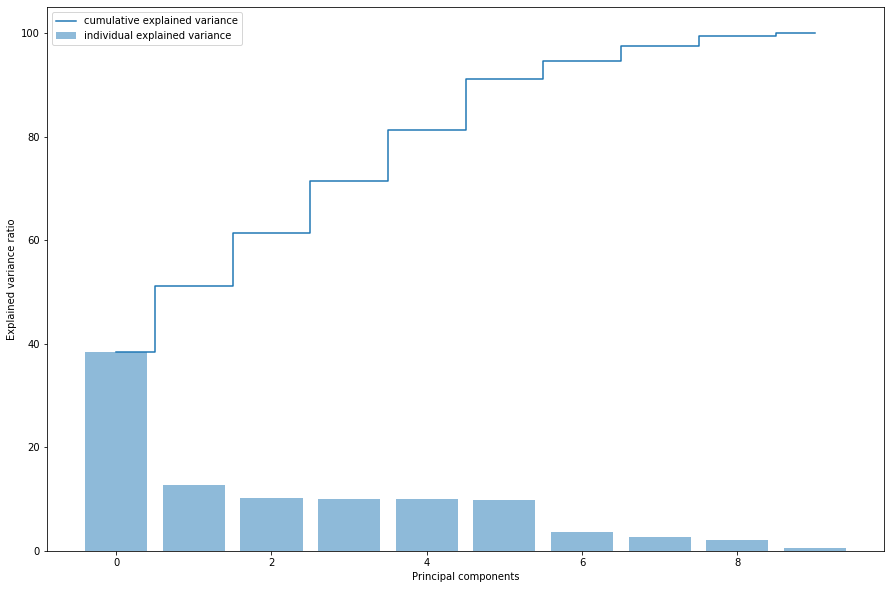

In [86]:
rcParams['figure.figsize']=15,10
plt.bar(range(10), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
plt.step(range(10), cum_var_exp, where='mid',
             label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

##### Thus, 7 or 8 principal components would be enough as the eigen values are too low for the others and the explain very little variability of the data

In [78]:
pca_data = PCA(n_components=8)
principalComponents = pca_data.fit_transform(scaled_data)

In [79]:
pdf=pd.DataFrame(principalComponents,columns = ['P1', 'P2','P3','P4','P5','P6','P7','P8'])

In [80]:
pdf.head()

,P1,P2,P3,P4,P5,P6,P7,P8
0,-3.292129,0.515508,-0.278804,0.556507,-0.538312,1.992509,0.400696,0.330330
1,3.161429,-0.409749,-0.118414,0.747184,-1.081504,-2.134396,-0.162555,-0.437601
2,-1.744102,0.784136,-1.918656,0.524833,-0.153939,0.637213,-0.905862,0.744242
3,-1.794560,-1.064123,0.353182,0.775595,-0.139172,-1.625794,1.045619,0.186502
4,-0.104052,1.490771,-1.550477,0.922009,1.288504,-0.016103,0.142823,0.596988


In [81]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(pdf.values, i) for i in range(pdf.shape[1])]
vif["Column"] = pdf.columns
vif

,VIF,Column
0,1.0,P1
1,1.0,P2
2,1.0,P3
3,1.0,P4
4,1.0,P5
5,1.0,P6
6,1.0,P7
7,1.0,P8


###### Rejoining the dropped columns to new dataframe , pdf

In [82]:
pdf['roof']=df['roof']

pdf['Roof(Area)']=df['Roof(Area)']

In [83]:
pdf.head()

,P1,P2,P3,P4,P5,P6,P7,P8,roof,Roof(Area)
0,-3.292129,0.515508,-0.278804,0.556507,-0.538312,1.992509,0.400696,0.330330,NO,0.0
1,3.161429,-0.409749,-0.118414,0.747184,-1.081504,-2.134396,-0.162555,-0.437601,NO,0.0
2,-1.744102,0.784136,-1.918656,0.524833,-0.153939,0.637213,-0.905862,0.744242,YES,97.0
3,-1.794560,-1.064123,0.353182,0.775595,-0.139172,-1.625794,1.045619,0.186502,NO,0.0
4,-0.104052,1.490771,-1.550477,0.922009,1.288504,-0.016103,0.142823,0.596988,NaN,NaN


###### Below, we take observations with non missing values to build a model and use it to predict the values for the entire data.
###### We then impute this value into columns with missing values. 
###### We first perform this by dropping 'Roof(Area)' because the same observations are missing in both the columns.
###### We use a voting classifier built from 5 other models to do this

In [88]:
nomissing=pdf.drop(['Roof(Area)'],axis=1)
nomissing=nomissing.dropna()

nmX=nomissing.drop('roof',axis=1)
nmY=nomissing['roof']

nmX_train,nmX_test,nmY_train,nmY_test=train_test_split(nmX,nmY,test_size=.25,random_state=42)
lr=LogisticRegression()
xg=XGBClassifier()
svm=SVC()
rf=RandomForestClassifier()
nb=GaussianNB()
vclassifier=VotingClassifier(estimators=[('lr',lr),('xg',xg),('svm',svm),('rf',rf),('nb',nb)],voting='hard')


In [89]:
mX=pdf.drop(['roof','Roof(Area)'],axis=1)
mY=pdf['roof']


vclassifier.fit(nmX,nmY)
Y_pred=vclassifier.predict(mX)

pdf['roof_impute']=Y_pred

pdf['roof']=pdf['roof'].fillna(pdf['roof_impute'])

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


###### If Roof has a value 'NO' then 'Roof(Area)' will obviosly be 0, we implement this idea here

In [90]:
pdf['Roof(Area)'][pdf['roof']=='NO']=0

C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Label encoding Roof in order to build model to predict 'Roof(Area)'

In [91]:
labelencoder_X_1=LabelEncoder()
pdf["roof"] = labelencoder_X_1.fit_transform(pdf["roof"])

In [92]:
pdf=pdf.drop(['roof_impute'],axis=1)

pdf.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,roof,Roof(Area)
0,-3.290239,0.517789,-0.278733,0.555757,-0.538801,1.992564,0.400851,0.334858,0.703194,0,0.0
1,3.162046,-0.408956,-0.118378,0.746580,-1.082128,-2.134280,-0.161923,-0.436275,0.065894,0,0.0
2,-1.742376,0.786141,-1.918748,0.524288,-0.154600,0.637312,-0.905888,0.748634,0.835679,1,97.0
3,-1.795422,-1.065730,0.353370,0.775107,-0.139824,-1.625846,1.045226,0.185001,-0.336938,0,0.0
4,-0.104765,1.489616,-1.551288,0.923134,1.287851,-0.015959,0.142372,0.597461,0.256158,1,NaN


In [93]:
complete=pdf.dropna()
cX=complete.drop('Roof(Area)',axis=1)
cY=complete['Roof(Area)']

###### We use a XGBRegressor to predict the values of 'Roof(Area)'

In [94]:
imp=XGBRegressor()
imp.fit(cX,cY)

C:\Users\Daniel\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Daniel\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[14:58:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [95]:
ncX=pdf.drop('Roof(Area)',axis=1)

imp_pred=imp.predict(ncX)

In [96]:
pdf['roof_area_impute']=imp_pred

pdf['Roof(Area)']=pdf['Roof(Area)'].fillna(pdf['roof_area_impute'])

pdf=pdf.drop("roof_area_impute",axis=1)

#### Test for data consistency and skewness before building our final model

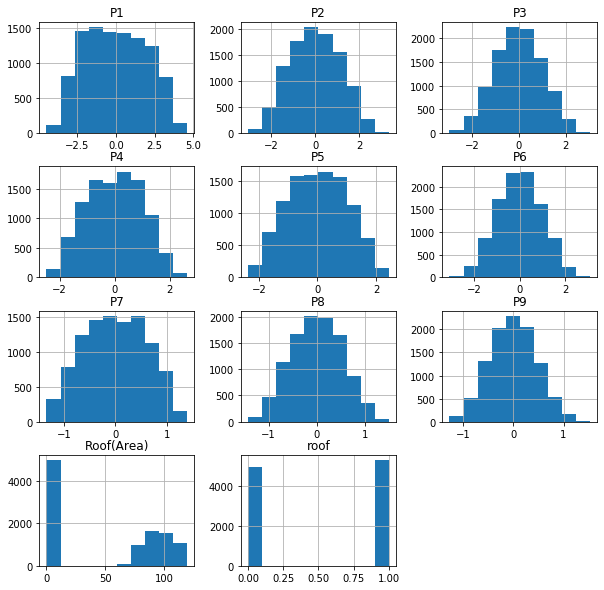

In [97]:
rcParams['figure.figsize']=10,10
pdf.hist()
plt.show()

In [98]:
pd.DataFrame(pdf.columns,np.abs(skew(pdf)))

,0
0.076185,P1
0.041649,P2
0.002368,P3
0.018109,P4
0.005081,P5
0.001082,P6
0.012946,P7
0.014638,P8
0.060464,P9
0.063922,roof


In [99]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Data columns (total 11 columns):
P1            10299 non-null float64
P2            10299 non-null float64
P3            10299 non-null float64
P4            10299 non-null float64
P5            10299 non-null float64
P6            10299 non-null float64
P7            10299 non-null float64
P8            10299 non-null float64
P9            10299 non-null float64
roof          10299 non-null int32
Roof(Area)    10299 non-null float64
dtypes: float64(10), int32(1)
memory usage: 845.0 KB


In [100]:
pdf.corr()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,roof,Roof(Area)
P1,1.000000e+00,4.585818e-16,2.293251e-16,-1.352268e-16,-2.356716e-16,-1.071829e-16,-1.255401e-17,-3.243841e-16,3.346241e-16,0.046907,0.045830
P2,4.585818e-16,1.000000e+00,1.198805e-15,-5.063240e-16,-9.303281e-16,-4.802619e-16,-3.398205e-17,2.940072e-17,-2.386882e-16,0.093378,0.097125
P3,2.293251e-16,1.198805e-15,1.000000e+00,-1.396244e-15,-2.154730e-15,-9.088696e-16,-3.902349e-16,-2.188274e-16,-3.106751e-16,0.018477,0.015657
P4,-1.352268e-16,-5.063240e-16,-1.396244e-15,1.000000e+00,1.743165e-16,1.102762e-15,-2.379310e-16,3.301729e-16,2.386886e-16,0.000025,-0.002042
P5,-2.356716e-16,-9.303281e-16,-2.154730e-15,1.743165e-16,1.000000e+00,1.447898e-15,2.002678e-16,3.407539e-16,5.377914e-17,0.013085,0.013120
P6,-1.071829e-16,-4.802619e-16,-9.088696e-16,1.102762e-15,1.447898e-15,1.000000e+00,1.827266e-16,-2.279690e-16,1.928665e-16,-0.021427,-0.021795
P7,-1.255401e-17,-3.398205e-17,-3.902349e-16,-2.379310e-16,2.002678e-16,1.827266e-16,1.000000e+00,3.288939e-16,-3.810697e-16,0.046759,0.049183
P8,-3.243841e-16,2.940072e-17,-2.188274e-16,3.301729e-16,3.407539e-16,-2.279690e-16,3.288939e-16,1.000000e+00,1.156239e-15,0.193246,0.197379
P9,3.346241e-16,-2.386882e-16,-3.106751e-16,2.386886e-16,5.377914e-17,1.928665e-16,-3.810697e-16,1.156239e-15,1.000000e+00,0.362753,0.366298
roof,4.690703e-02,9.337785e-02,1.847748e-02,2.523443e-05,1.308530e-02,-2.142718e-02,4.675904e-02,1.932463e-01,3.627533e-01,1.000000,0.982283


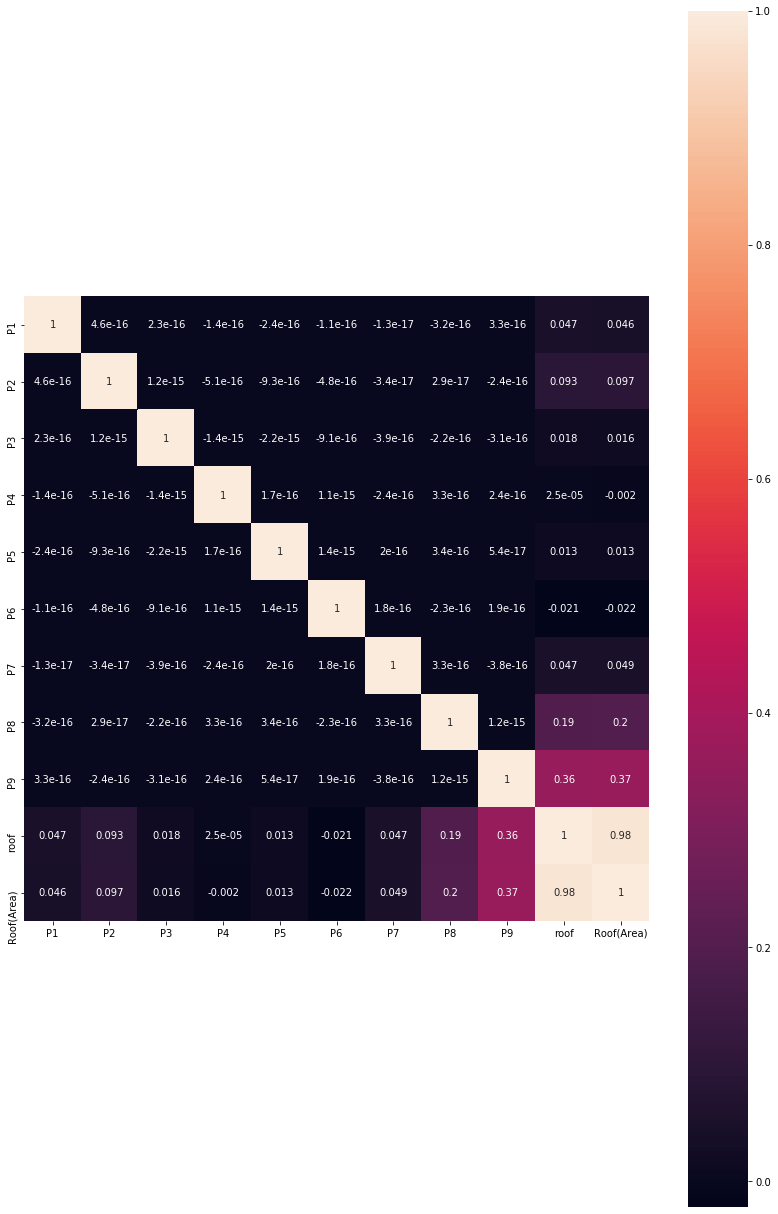

In [101]:
plt.figure(figsize=(14,22))
datax=pdf.iloc[:,0:12]
sns.heatmap(datax.astype(float).corr(),square=True,linecolor='white',annot=True)
plt.show()

In [99]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(pdf.values, i) for i in range(pdf.shape[1])]
vif["features"] = pdf.columns
vif

,VIF Factor,features
0,1.001483,P1
1,1.004794,P2
2,1.000302,P3
3,1.000134,P4
4,1.000018,P5
5,1.000053,P6
6,1.000852,P7
7,1.015296,P8
8,1.056596,P9
9,60.462838,roof


##### we drop roof as this variability can be explained by 'Roof(Area)'

In [102]:
pdf=pdf.drop('roof',axis=1)

In [103]:
pdf.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,Roof(Area)
0,-3.290239,0.517789,-0.278733,0.555757,-0.538801,1.992564,0.400851,0.334858,0.703194,0.000000
1,3.162046,-0.408956,-0.118378,0.746580,-1.082128,-2.134280,-0.161923,-0.436275,0.065894,0.000000
2,-1.742376,0.786141,-1.918748,0.524288,-0.154600,0.637312,-0.905888,0.748634,0.835679,97.000000
3,-1.795422,-1.065730,0.353370,0.775107,-0.139824,-1.625846,1.045226,0.185001,-0.336938,0.000000
4,-0.104765,1.489616,-1.551288,0.923134,1.287851,-0.015959,0.142372,0.597461,0.256158,97.334732


##### Scaling Roof along with other components and storing in new dataframe, sdf

In [105]:
sc=StandardScaler()
scaled=sc.fit_transform(pdf)

In [106]:
sdf=pd.DataFrame(scaled,index=pdf.index, columns=pdf.columns)

In [107]:
sdf.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,Roof(Area)
0,-1.678198,0.459939,-0.275563,0.555084,-0.539839,2.019260,0.667084,0.640790,1.526650,-1.014180
1,1.612813,-0.363266,-0.117031,0.745675,-1.084212,-2.162874,-0.269468,-0.834864,0.143057,-1.014180
2,-0.888705,0.698310,-1.896923,0.523652,-0.154897,0.645851,-1.507551,1.432599,1.814278,0.977873
3,-0.915761,-0.946663,0.349350,0.774168,-0.140093,-1.647629,1.739433,0.354021,-0.731500,-1.014180
4,-0.053436,1.323190,-1.533642,0.922015,1.290331,-0.016173,0.236932,1.143311,0.556125,0.984747


### Train/Test re-split:

In [108]:
X_train=sdf.head(7000)
Y_train=train_grade
X_test=sdf.tail(3299)

# Trying out various models and choosing the best by cross validation

#### We take tonly our Train data for this purpose

In [131]:
scores_list=[] #to store score of each model
model_list=[] #to score name of each model

### Logistic Regression

In [150]:
lr=LogisticRegression(solver='lbfgs') #auto selects multinomial if solver is lbfgs

In [151]:
cv_lr=cross_val_score(lr, X_train,Y_train, cv=10)

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Daniel\Anaconda3\lib\si

In [152]:
print(cv_lr.mean())

0.8415744863793035


In [153]:
scores_list.append(cv_lr.mean())
model_list.append('Logistic Regression')

### Naive Bayes:

In [154]:
nb=GaussianNB()

In [155]:
cv_nb=cross_val_score(nb, X_train,Y_train, cv=10)

In [156]:
print(cv_nb.mean())

0.7545860688305421


In [157]:
scores_list.append(cv_nb.mean())
model_list.append('Naive Bayes')

### Random Forest

In [127]:
rf=RandomForestClassifier(n_estimators=20)

In [128]:
cv_rf=cross_val_score(rf, X_train,Y_train, cv=10)

In [130]:
print(cv_rf.mean())

0.8744467085674648


In [132]:
scores_list.append(cv_rf.mean())
model_list.append('Random Forest')

### XGBClassifier:

In [135]:
xgb=XGBClassifier()

In [136]:
cv_xgb=cross_val_score(xgb, X_train,Y_train, cv=10)

In [137]:
print(cv_xgb.mean())

0.8818626495796028


In [138]:
scores_list.append(cv_xgb.mean())
model_list.append('XGB Classifier')

### SVM:

In [141]:
svm=SVC() #using the default 'RBF' kernel

In [142]:
cv_svm=cross_val_score(svm, X_train,Y_train, cv=10)

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureW

In [143]:
print(cv_svm.mean())

0.9082903491635023


In [145]:
scores_list.append(cv_svm.mean())
model_list.append('SVM')

### Voting Classifier:

##### This creates a Voting classifier of previously used classifiers to predict values. It is best to pass odd number of models into this classifiers to help tie breaking moments

In [160]:
vc=VotingClassifier(estimators=[('lr',lr),('xg',xg),('svm',svm),('rf',rf),('nb',nb)],voting='hard')

In [161]:
cv_vc=cross_val_score(vc, X_train,Y_train, cv=10)

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set g

In [162]:
print(cv_vc.mean())

0.89214822369482


In [164]:
scores_list.append(cv_vc.mean())
model_list.append('Voting Classifier')

## Artificail Neural Networks:

### TensorFlow backend:

#### Importing libraries needed to run Keras Classifier for our multiclass problem:

In [166]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

Using TensorFlow backend.


##### The Target variable is to be Label encoded and one hot encoded:

In [168]:
X=X_train
Y=Y_train

In [169]:
encod = LabelEncoder()
encod.fit(Y)
encod_Y = encod.transform(Y)

In [170]:
dum_y = np_utils.to_categorical(encod_Y)

##### Creating the base model function to pass to our Keras Classifier:

In [171]:

def bmodel():
        model = Sequential()
        model.add(Dense(20, input_dim=10, activation='relu'))
        model.add(Dense(5, activation='softmax'))
        
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model



In [172]:
ANN = KerasClassifier(build_fn=bmodel, epochs=200, batch_size=5, verbose=8)

In [209]:
cv_NN=cross_val_score(ANN, X,encod_Y, cv=10)

Epoch 1/200
Epoch 2/200
Epoch 3/200
Epoch 4/200
Epoch 5/200
Epoch 6/200
Epoch 7/200
Epoch 8/200
Epoch 9/200
Epoch 10/200
Epoch 11/200
Epoch 12/200
Epoch 13/200
Epoch 14/200
Epoch 15/200
Epoch 16/200
Epoch 17/200
Epoch 18/200
Epoch 19/200
Epoch 20/200
Epoch 21/200
Epoch 22/200
Epoch 23/200
Epoch 24/200
Epoch 25/200
Epoch 26/200
Epoch 27/200
Epoch 28/200
Epoch 29/200
Epoch 30/200
Epoch 31/200
Epoch 32/200
Epoch 33/200
Epoch 34/200
Epoch 35/200
Epoch 36/200
Epoch 37/200
Epoch 38/200
Epoch 39/200
Epoch 40/200
Epoch 41/200
Epoch 42/200
Epoch 43/200
Epoch 44/200
Epoch 45/200
Epoch 46/200
Epoch 47/200
Epoch 48/200
Epoch 49/200
Epoch 50/200
Epoch 51/200
Epoch 52/200
Epoch 53/200
Epoch 54/200
Epoch 55/200
Epoch 56/200
Epoch 57/200
Epoch 58/200
Epoch 59/200
Epoch 60/200
Epoch 61/200
Epoch 62/200
Epoch 63/200
Epoch 64/200
Epoch 65/200
Epoch 66/200
Epoch 67/200
Epoch 68/200
Epoch 69/200
Epoch 70/200
Epoch 71/200
Epoch 72/200
Epoch 73/200
Epoch 74/200
Epoch 75/200
Epoch 76/200
Epoch 77/200
Epoch 78

In [214]:
print(cv_NN.mean())

0.9234285712242126


In [176]:
scores_list.append(cv_NN.mean())
model_list.append('Neural Network')

In [177]:
scores_list=[i*100 for i in scores_list]

### Comparing the various model performances to choose the best:

In [179]:
Comparision=pd.DataFrame()
Comparision['Model']=model_list
Comparision['Score']=scores_list

In [180]:
Comparision['Score']=Comparision['Score'].round(3)

In [188]:
Comparision['Score'][Comparision['Model']=='Neural Network']=

,Model,Score
0,Random Forest,87.445
1,XGB Classifier,88.186
2,SVM,90.829
3,Logistic Regression,84.157
4,Naive Bayes,75.459
5,Voting Classifier,89.215
6,Neural Network,92.429


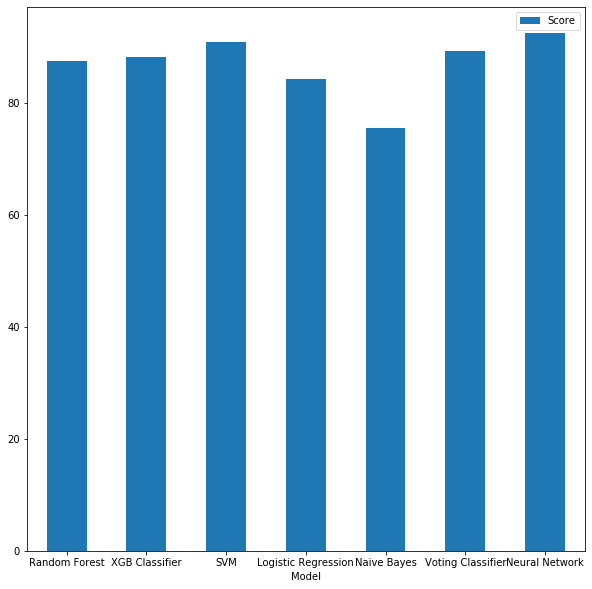

In [258]:
Comparision.plot.bar(x='Model', y='Score', rot=0)
plt.show()

##### Hence we see that our Keras classifier predicts the best

### Tuning the Selected ANN model for best accuracy:

##### Creating Keras Classifier with a validation split of 33%

In [234]:
KRAS = KerasClassifier(build_fn=bmodel,validation_split=0.33, epochs=800, batch_size=8)

##### Fitting and saving the fit data inside 'tuning' to refer in the next step

In [235]:
tuning=KRAS.fit(X,encod_Y)

Train on 4689 samples, validate on 2311 samples
Epoch 1/800
4689/4689 [==============================] - 2s 465us/step - loss: 1.1900 - accuracy: 0.5020 - val_loss: 0.8113 - val_accuracy: 0.7161
Epoch 2/800
4689/4689 [==============================] - 2s 347us/step - loss: 0.6651 - accuracy: 0.7765 - val_loss: 0.5659 - val_accuracy: 0.8161
Epoch 3/800
4689/4689 [==============================] - 2s 346us/step - loss: 0.5097 - accuracy: 0.8307 - val_loss: 0.4728 - val_accuracy: 0.8498
Epoch 4/800
4689/4689 [==============================] - 2s 348us/step - loss: 0.4360 - accuracy: 0.8571 - val_loss: 0.4149 - val_accuracy: 0.8646
Epoch 5/800
4689/4689 [==============================] - 2s 346us/step - loss: 0.3887 - accuracy: 0.8680 - val_loss: 0.3786 - val_accuracy: 0.8745
Epoch 6/800
4689/4689 [==============================] - 2s 423us/step - loss: 0.3540 - accuracy: 0.8752 - val_loss: 0.3474 - val_accuracy: 0.8788
Epoch 7/800
4689/4689 [==============================] - 2s 344us/step

##### Let us check the parameters and find out the best epoch value to use in our model

In [237]:
tuning.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [238]:

TuneDF=pd.DataFrame()
TuneDF['accuracy']=tuning.history['accuracy']
TuneDF['val_accuracy']=tuning.history['val_accuracy']
TuneDF['loss']=tuning.history['loss']
TuneDF['val_loss']=tuning.history['val_loss']
TuneDF['epoch']=TuneDF.index.tolist() #using the index number as the epoch number as they are the same


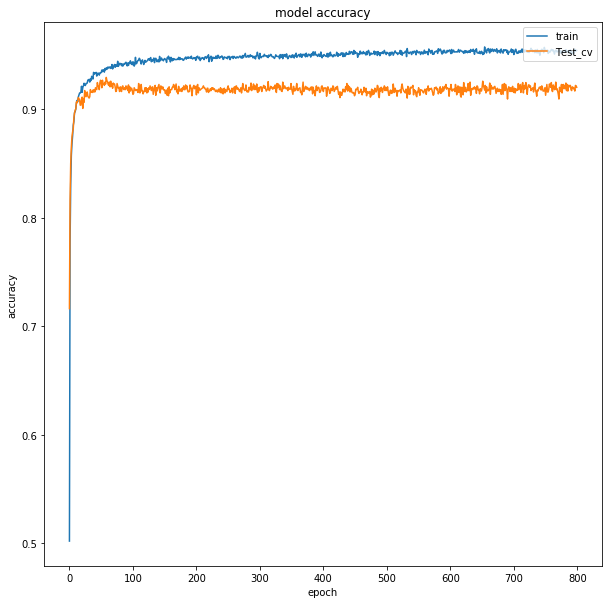

In [259]:
plt.plot(TuneDF['accuracy'])
plt.plot(TuneDF['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Test_cv'], loc='best')
plt.show()

#### Let's get the epochs where the validation accuracy and train set accuracy are highest

##### we do not need loss in the current problem so we ignore loss values

In [240]:
print('Max Validation Accuracy(epoch number):',
      TuneDF['epoch'][TuneDF['val_accuracy'] == TuneDF['val_accuracy'].max()].tolist(),
      'Score:',
      TuneDF['val_accuracy'].max()
     )
print('')
print("Max Train Accuracy(epoch number):",
      TuneDF['epoch'][TuneDF['accuracy'] == TuneDF['accuracy'].max()].tolist(),
      'Score:',
       TuneDF['accuracy'].max()
     )
      

Max Validation Accuracy(epoch number): [58] Score: 0.9290350675582886

Max Train Accuracy(epoch number): [654] Score: 0.9571337103843689


##### The training accuracy is high mainly due to overfitting so let's go with an epoch close to highest validation accuracy

###### Hence we now know around which value to give the epoch argument to get close to the best accuracy

## Final Model building:

In [246]:
Final_Keras=KerasClassifier(build_fn=bmodel,epochs=100, batch_size=8)

In [247]:
Final_Keras.fit(X,encod_Y)

Epoch 1/100
7000/7000 [==============================] - 2s 311us/step - loss: 0.9600 - accuracy: 0.6277
Epoch 2/100
7000/7000 [==============================] - 3s 372us/step - loss: 0.5265 - accuracy: 0.8329
Epoch 3/100
7000/7000 [==============================] - 3s 492us/step - loss: 0.4112 - accuracy: 0.8597
Epoch 4/100
7000/7000 [==============================] - 3s 468us/step - loss: 0.3512 - accuracy: 0.8794
Epoch 5/100
7000/7000 [==============================] - 3s 468us/step - loss: 0.3127 - accuracy: 0.8886
Epoch 6/100
7000/7000 [==============================] - 3s 473us/step - loss: 0.2863 - accuracy: 0.8947
Epoch 7/100
7000/7000 [==============================] - 3s 454us/step - loss: 0.2676 - accuracy: 0.9013
Epoch 8/100
7000/7000 [==============================] - 4s 525us/step - loss: 0.2523 - accuracy: 0.9061
Epoch 9/100
7000/7000 [==============================] - 4s 541us/step - loss: 0.2411 - accuracy: 0.9077
Epoch 10/100
7000/7000 [==============================]

In [250]:
predictions = Final_Keras.predict(X_test)
Keras_Pred=encod.inverse_transform(predictions)

print(Keras_Pred)

['B' 'D' 'C' ... 'C' 'D' 'D']


In [251]:
Output=pd.DataFrame()

In [252]:
Output['id']=test_id
Output['Grade']=Keras_Pred

In [253]:
Output.to_csv("C:/PGA10/Projects/Skillenza/OutpuFile.csv",index=False)